# wsitools - ImageSplitterMerger

In [ ]:
%load_ext autoreload
%autoreload 2

## Installing dependencies and import needed modules

In [ ]:
# Instalations of needed modules
!pip install openslide-python openslide-bin imagecodecs loguru read_roi czifile
!pip install git+https://github.com/mjirik/imma.git

# Modules import
import matplotlib.pyplot as plt
import numpy as np
import imma
import requests
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.0/359.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openslide-python: filename=openslide_python-1.3.1-cp310-cp310-linux_x86_64.whl size=33551 sha256=255aabc9f2b8e9a54469a5bec4ef7c2ea9aed74ae7ddce470506e04af0504d71
  Stored in directory: /root/.cache/pip/wheels/79/79/fa/29a0087493c69dff7fd0b70fab5d6771002a531010161d2d97
  Created wheel for read_roi: filename=read_roi-1.6.0-py2.py3-none-any.whl size=8017 sha256=fa7a4c16a034b9054662c2db6ae9bca1202dd1de5f90f646a452ac6063940fb5
  Stored in directory: /root/.cache/pip/wheels/09/67/72/4903ef58791d5330f9946373f84126b8b79027879ac828702e
Successfully built openslide-python read_roi

In [ ]:
!python --version
print("Numpy version: {}".format(np.__version__))

Python 3.10.12
Numpy version: 1.25.2


In [ ]:
# WSI tools installation
!pip install git+https://github.com/mjirik/wsitools.git

  Cloning https://github.com/mjirik/wsitools.git to /tmp/pip-req-build-m_57i5h9
  Running command git clone --filter=blob:none --quiet https://github.com/mjirik/wsitools.git /tmp/pip-req-build-m_57i5h9
  Resolved https://github.com/mjirik/wsitools.git to commit 5fb6358a69233f298233de883014d630a2a717d3
  Preparing metadata (setup.py) ... done
  Created wheel for wsitools: filename=wsitools-0.1.0-py2.py3-none-any.whl size=29457 sha256=6f1208c3c87248113972bc6e2925c3a62da656f2edbcc81f17a83d80672fe5d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-mzecqqn6/wheels/e7/90/f0/a64e5e83413259627b872fb44d41b0f233a6551ade74a9e640
Successfully built wsitools


### Image procesing

In [ ]:
from wsitools.tile_image import ImageSplitterMerger

2024-05-15 07:10:36.381 | WARNING  | wsitools.libfixer:<module>:15 - This module is deprecated. Use openslide and openslide_bin instead.


Own upload of .czi file

In [ ]:
# filename = "J7_5_a_ann0001.czi"
# filename = "J7_5_a_test.czi"
# anim = wsitools.image.AnnotatedImage(filename)

# # Annotations
# print(anim.annotations)

The example of a function for tile processing

In [ ]:
def process_tile_test(tile: np.array) -> np.array:
    """
    Process a tile by drawing a red square on it.

    Parameters:
    - tile (np.array): Input tile image (assumed to be in RGB format).

    Returns:
    - np.array: Processed tile with a red square drawn on it.
    """
    if tile.shape[2] != 3:
        raise ValueError("Image ndarray must have 3 channels for RGB.")

    # Create a copy of the image to avoid modifying the original array
    result_tile = np.copy(tile)

    # Set the red color (assuming RGB format)
    red_color = [255, 0, 0]

    # Draw the red square
    result_tile[50:50 + 50, 50:50 + 50, :] = red_color

    return result_tile

Getting .czi file via url

In [ ]:
def download_czi_file(url_path: str, filename: str):
    url_path = os.path.join(url_path, filename)

    # Fetch the file
    response = requests.get(url_path)

    # Check if the request was successful
    if response.status_code == 200:
        # Save the content to a local file
        with open(filename, "wb") as file:
            file.write(response.content)
    else:
        print("Failed to fetch the file from GitHub")

In [ ]:
# Possible filenames: J7_5_a.czi, J7_25_a_ann0004.czi, J8_8_a.czi
filename = "J7_5_a.czi"

# URL of the file on GitHub
url_path = "https://github.com/janburian/Masters_thesis/raw/main/data_czi/"

download_czi_file(url_path, filename)

Split and merge input image in .czi format and during that process each tile

2024-05-15 07:10:38.713 | DEBUG    | wsitools.image:__init__:412 - fs_enc: utf-8
2024-05-15 07:10:38.720 | DEBUG    | wsitools.image:__init__:413 - Reading file J7_5_a.czi
2024-05-15 07:10:38.752 | DEBUG    | wsitools.image:_set_properties_czi:342 - nzi pixelsize  8.772367043811993e-07x8.772367043811993e-07 [m]
2024-05-15 07:10:38.758 | DEBUG    | wsitools.image:read_annotations:723 - Reading the annotation J7_5_a.czi


True


Merging Tiles: 100%|██████████| 42/42 [00:00<00:00, 530.32it/s]


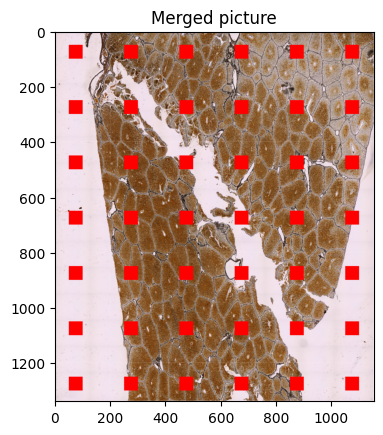

In [ ]:
# Create an ImageSplitterMerger instance with the specified parameters
image = ImageSplitterMerger(filename, tilesize_px=200, overlap_px=0, pixelsize_mm=[0.01, 0.01],
                            fcn=process_tile_test)

# Split and merge the image, applying the specified tile processing function
merged_image = image.split_and_merge_image()

# Display the input and merged images using Matplotlib
plt.imshow(merged_image)
plt.title("Merged picture")
plt.show()

# Save the merged image as a PNG file
# plt.imsave("output.png", merged_image)